# Epidemic

In this project we will be working with the following model of a spread of an infectious  disease.

- First, we create a graph representing interations between people. Each node in this graph is a person. 
  If two nodes are connected by an edge, then the people they represent are in contact and can infect each other.
- Each node in the graph is in one the following states: 

:::{table}
:label: table
:align: center
  | Value |  | Meaning                                                                                |
  |:------|--|----------------------------------------------------------------------------------------|
  | `0`   |  | The node is healthy, but it can become infected.                                       |
  | `1`   |  | The node is infected and can infect its healthy neighbors.                             |
  | `2`   |  | The node was infected, but it recoved from the disease and can't get infected anymore. |
:::

For example, in the plot below healthy nodes are green, infected nodes are red and recovered nodes are yellow. 

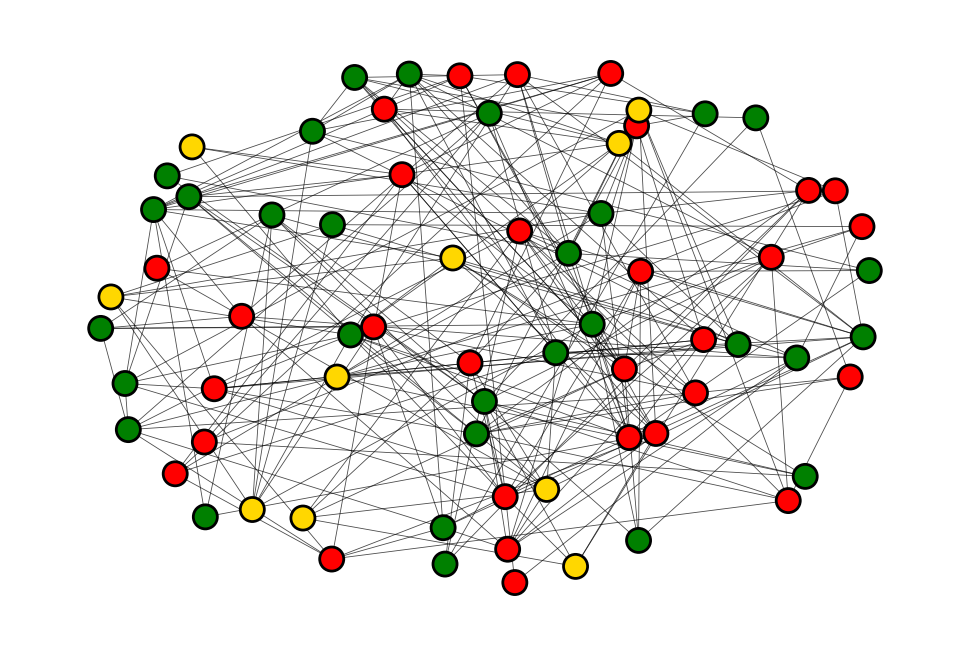

In [252]:
# remove-cell
%config InlineBackend.figure_format = 'retina'
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

G = nx.erdos_renyi_graph(n=70, p=0.1, seed=3)
pos = nx.spring_layout(G, k=1.6, seed=5)
plt.figure(figsize=(6, 4))
colors = ["green"]*30 + ["red"]*30 + ["gold"]*10


nx.draw_networkx_nodes(G, 
                        pos=pos, 
                        node_color=colors, 
                        node_size=75,
                        edgecolors='k',
                        linewidths=1,
                        )

nx.draw_networkx_edges(G, 
                        pos=pos,
                        edge_color='k',
                        alpha=0.7,
                        width=0.3
                    )

plt.axis('off')
plt.show()


To model the spread of an epidemic we choose two numbers $0 \leq $ `pi`, `pr` $\leq 1$. Then the epidemic is modeled step by step as follows:
- We start with some number of infected nodes, all other nodes healthy.  
- At each step, an infected node infects each of its healthy neighbors with probability `pi`. Also, an infected node recovers from the infection 
  with probability `pr`. 

:::{figure} epidemic_spread.gif
:alt: Animation of the spread of an epidemic in a graph
:align: center
:width: 100%
:::


## Project

Use the epidemic model to investigate various aspects of epidemic spead. Here are some possible topics you may consider. 
You do not need to investigate all of them - you can choose a few or come up with different topics on you own.

1. How does the progression of the epidemic depend on properties of the graph (size, average degree, etc.). 
2. Tipping point: Fix the probability of recovery `pr` and vary the probability of infection `pi`. How does the fraction of nodes 
   that will eventually get infected changes as `pi` increases? How does the maximum number of nodes who are infected at once 
   during the course of the epidemic depends on `pi`?
3. Repeat part 2, but keeping `pi` and changing values of `pr`. 
4. Introduce another state of nodes `3` (vaccinated). A node in this state cannot get infected. Assume that some fraction 
   of nodes are in this state at the beginning. How does this affect the epidemic spread? How does it depend on the size of the fraction 
   of vaccinated nodes? 
5. Lets say that we have only a limited number of vaccines that we can use. Does it matter if we vaccinate random nodes, or if we select 
   some specific nodes (e.g. ones with the biggest degrees)? 
6. Effect of social distancing: assume that we remove some fraction of edges from the graph. How will it affect the spread of the epidemic? 
7. Change the model, so that a recovered mode can get infected again. Fix the value of `pr` and vary `pi`. For what values of `pi` epidemic 
   dies off after some time and for what values it seems to persist indefinitely?


<Figure size 600x400 with 0 Axes>

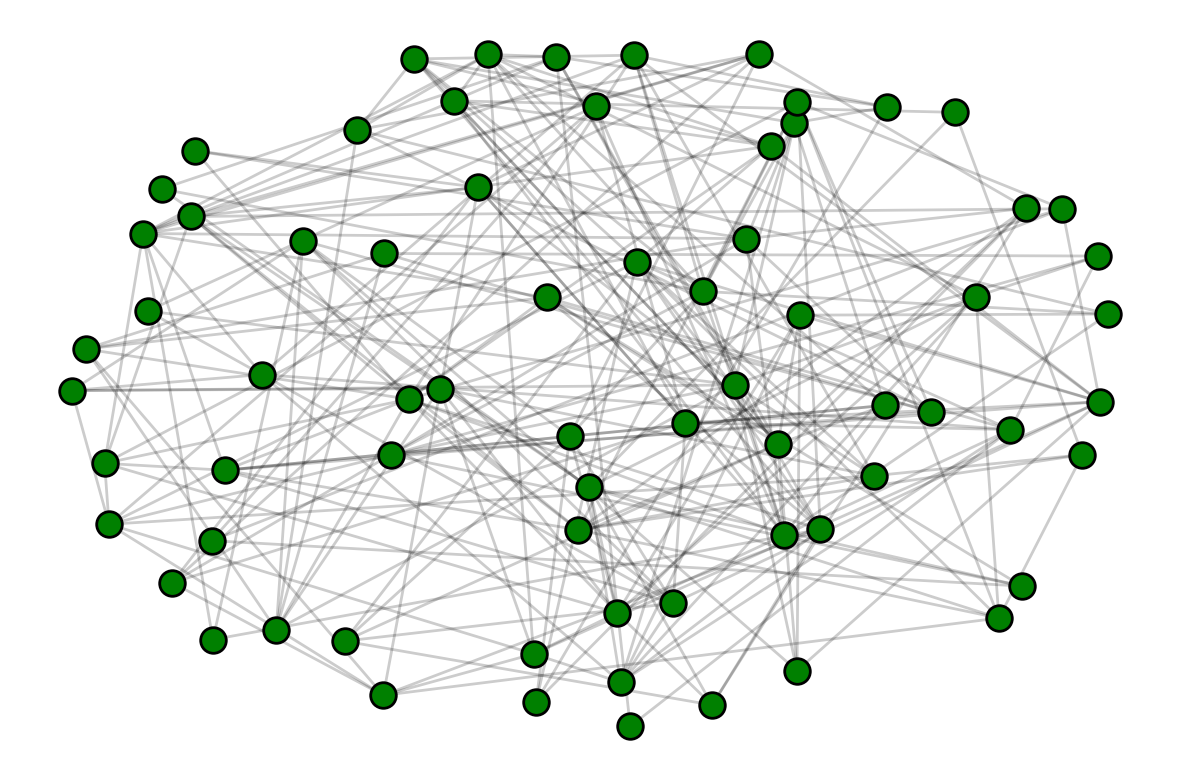

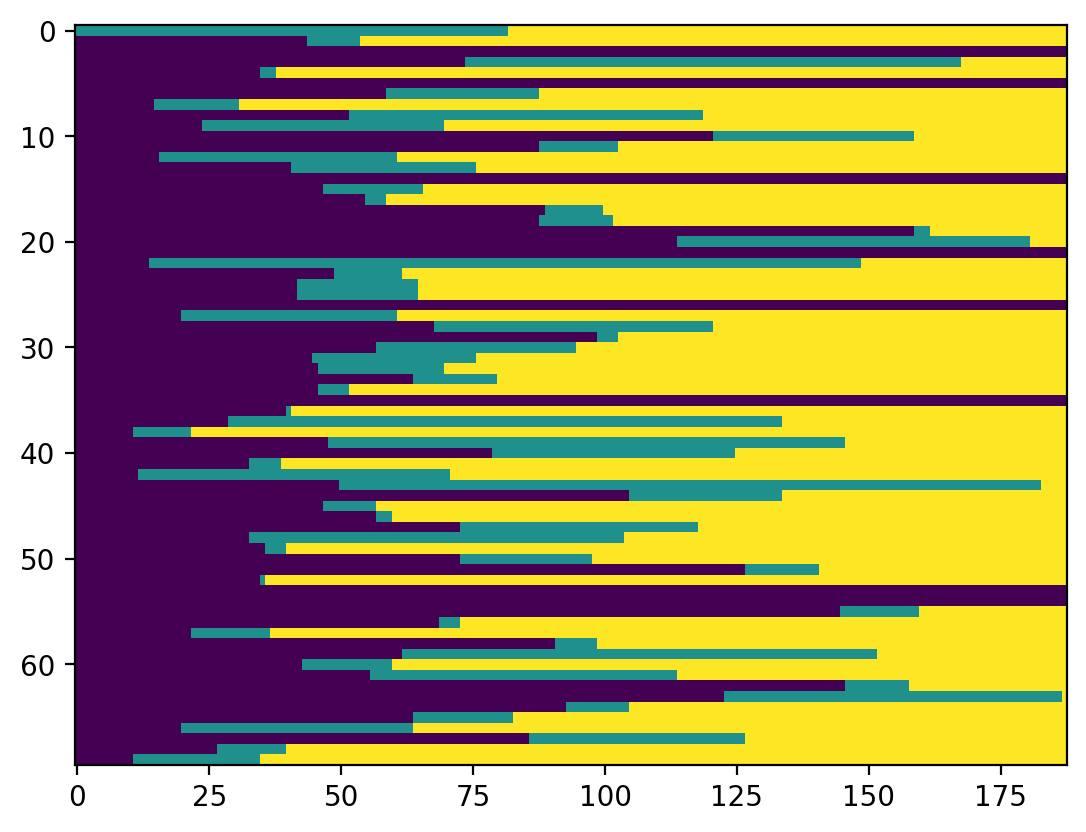

In [263]:
# remove-cell
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


def epi(G, s, pi, pr, seed=None, max_steps=1000):

    e = [s.copy()]
    inf = []

    rng = np.random.default_rng(seed=seed)

    for i in range(max_steps):
        step_inf = []
        ns = s.copy()
        for i  in np.flatnonzero(s == 1):
                nghbors = np.array(G[i])
                for j in nghbors:
                    if s[j] == 0 and rng.random() < pi:
                        ns[j] = 1   
                        step_inf.append(tuple(sorted((i, int(j)))))
                if  rng.random() < pr:
                    ns[i] = 2
        s = ns
        e.append(s)
        inf.append(step_inf)
        if np.all(s != 1):
            break
    
    inf.append([])
    return np.array(e, dtype=int), inf



G = nx.erdos_renyi_graph(n=70, p=0.1, seed=3)
pos = nx.spring_layout(G, k=1.6, seed=5)
plt.figure(figsize=(6, 4))

s = np.zeros(G.number_of_nodes(), dtype=int)
s[:1] = 1
# sim
e, inf = epi(G, s=s, pi=0.015, pr=0.03, seed=2)

fig, ax = plt.subplots()
fig.set_tight_layout(True)
fig.set_size_inches(6, 4)
ax.margins(0)

colors = ["green", "red", "gold"]
nodes = nx.draw_networkx_nodes(G, 
                       ax=ax,
                       pos=pos, 
                       node_color="green", 
                       edgecolors="k", 
                       linewidths=1,
                       node_size=85
                       )

edges = nx.draw_networkx_edges(G, 
                               ax=ax,
                               pos=pos,
                               edge_color=(0, 0, 0, 0.2)) 
                    
plt.axis('off')
plt.show()

def init():
    nodes.set_color("green")
    nodes.set_edgecolor('k')
    nodes.set_linewidth(1)
    return nodes,

def update(frame):
    if frame >= len(inf):
        frame = len(inf) - 1
    ec = [(0, 0, 0, 0.2) if (i, j) not in inf[frame] else 'r' for i, j in G.edges()]
    edges.set_color(ec)
    nodes.set_color([colors[s] for s in e[frame]])
    nodes.set_edgecolor('k')
    nodes.set_linewidth(1)
    return nodes, edges


ani = FuncAnimation(fig, 
                    update, 
                    frames=np.arange(e.shape[0]) + 10,
                    init_func=init, 
                    interval=750,
                    blit=True)



plt.imshow(e.T, aspect='auto', cmap='viridis')
plt.show()

ani.save("epidemic_spread.gif", writer=animation.PillowWriter(fps=2), dpi=200)